In [3]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "analog_1_512_07252024.signals_in.bin"

analog_actual_data = np.fromfile(file_path, dtype=np.float64).reshape((-1, 2))

file_path = "analog_1_512_07252024.signals_out.bin"

analog_target_data = np.fromfile(file_path, dtype=np.float64).reshape((-1, 2))

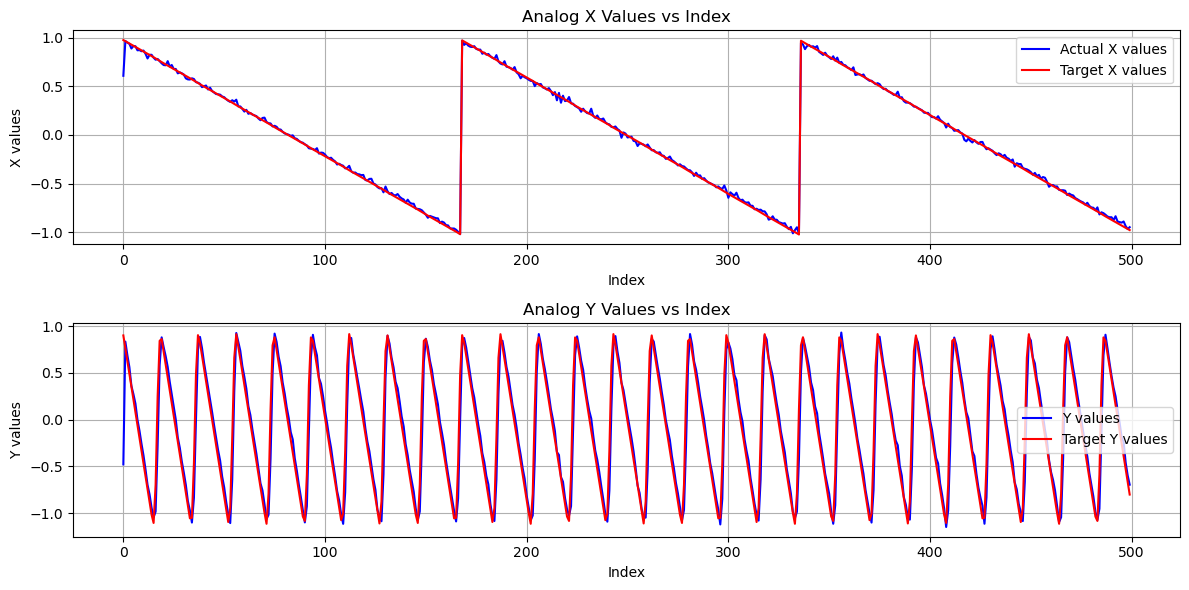

In [9]:
import matplotlib.pyplot as plt

# Define the range you want to sample from (up to 100,000 positions)
sample_range = 1000000

# Sample every 10th position up to 100,000 positions
x = analog_actual_data[:sample_range:2000, 1]
y = analog_actual_data[:sample_range:2000, 0]

x2 = analog_target_data[:sample_range:2000, 0]
y2 = analog_target_data[:sample_range:2000, 1]

# Create indices
indices = np.arange(len(x))

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Plot X values
plt.subplot(2, 1, 1)
plt.plot(indices, x, label='Actual X values', color='blue')
plt.plot(indices, x2, label = 'Target X values', color = 'red')
plt.title('Analog X Values vs Index')
plt.xlabel('Index')
plt.ylabel('X values')
plt.grid(True)
plt.legend()

# Plot Y values
plt.subplot(2, 1, 2)
plt.plot(indices, y, label='Y values', color='blue')
plt.plot(indices, y2, label = 'Target Y values', color = 'red')
plt.title('Analog Y Values vs Index')
plt.xlabel('Index')
plt.ylabel('Y values')
plt.grid(True)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [10]:
def read_txt(file_path):
    with open(file_path, 'r') as file:
        integers = []
        for line in file:
            clean_line = line.strip()
            first_part = int(clean_line[0:4], 16)
            second_part = int(clean_line[4:8], 16)
            integers.extend([first_part, second_part])
        return np.array(integers)

csv_file = "data_20240725.csv"
txt_file = "EnginePattern_raster_amp1_res512_hexadecimal_downsample.txt"
cutoff = 0

digital_actual_data = np.genfromtxt(csv_file, delimiter=',')[cutoff:]
digital_target_data = read_txt(txt_file)

digital_actual_data = (digital_actual_data - 32768) * 15 / 32768
digital_target_data = (digital_target_data - 32768) * 15 / 32768
digital_actual_data = digital_actual_data[:320, :-1]

digital_actual_data_x = digital_actual_data[:, ::2]
digital_actual_data_y = digital_actual_data[:, 1::2]
digital_target_data_x = digital_target_data[::2]
digital_target_data_y = digital_target_data[1::2]

digital_actual_data_x = digital_actual_data_x.reshape(10, 2620 * 32)
digital_actual_data_y = digital_actual_data_y.reshape(10, 2620 * 32)

In [12]:
analog_actual_data_x = analog_actual_data[:, 1]
analog_actual_data_y = analog_actual_data[:, 0]

analog_target_data_x = analog_target_data[:, 0]
analog_target_data_y = analog_target_data[:, 1]

print("analog actual x : ", analog_actual_data_x.shape)
print("analog actual y : ", analog_actual_data_y.shape)
print("analog target x : ", analog_target_data_x.shape)
print("analog target y : ", analog_target_data_y.shape)

analog actual x :  (2079744,)
analog actual y :  (2079744,)
analog target x :  (2079744,)
analog target y :  (2079744,)


In [14]:
digital_actual_data_x = digital_actual_data_x[1:5, :]
digital_actual_data_y = digital_actual_data_y[1:5, :]

print("digital actual x : ", digital_actual_data_x.shape)
print("digital actual y : ", digital_actual_data_y.shape)
print("digital target x : ", digital_target_data_x.shape)
print("digital target y : ", digital_target_data_y.shape)

digital actual x :  (4, 83840)
digital actual y :  (4, 83840)
digital target x :  (83840,)
digital target y :  (83840,)


In [28]:
analog_shift = 18
digital_shift = 5

analog_actual_data_x_shift = analog_actual_data_x[analog_shift : ]
analog_target_data_x_shift = analog_target_data_x[: - analog_shift]

digital_actual_data_x_shift = digital_actual_data_x[:, digital_shift : ]
digital_target_data_x_shift = digital_target_data_x[: - digital_shift]

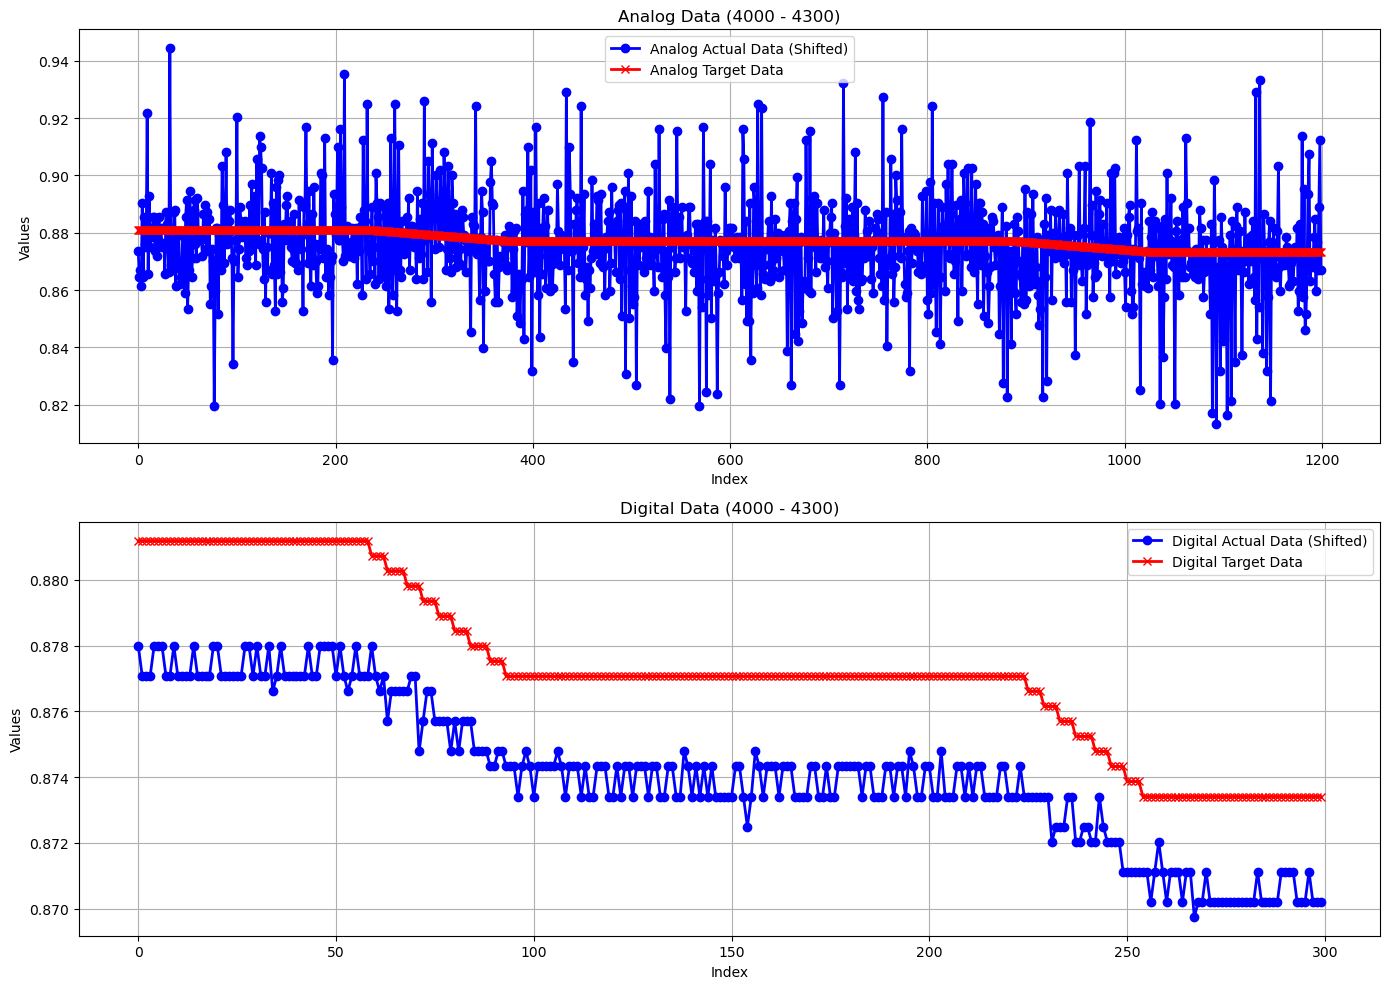

In [29]:
# Slice data for plotting (between 4000 and 4300 positions)
analog_actual_data_x_plot = analog_actual_data_x_shift[4000*4:4300*4]
analog_target_data_x_plot = analog_target_data_x_shift[4000*4:4300*4]

digital_actual_data_x_plot = digital_actual_data_x_shift[0, 4000:4300]  # Assuming the data is 2D and plotting the first column
digital_target_data_x_plot = digital_target_data_x_shift[4000:4300]  # Same assumption as above

# Create a 2x1 grid of subplots
plt.figure(figsize=(14, 10))

# Analog Data Plot
plt.subplot(2, 1, 1)
plt.plot(analog_actual_data_x_plot, label='Analog Actual Data (Shifted)', color='blue', marker='o', linewidth=2)
plt.plot(analog_target_data_x_plot, label='Analog Target Data', color='red', marker='x', linewidth=2)
plt.title('Analog Data (4000 - 4300)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Digital Data Plot
plt.subplot(2, 1, 2)
plt.plot(digital_actual_data_x_plot, label='Digital Actual Data (Shifted)', color='blue', marker='o', linewidth=2)
plt.plot(digital_target_data_x_plot, label='Digital Target Data', color='red', marker='x', linewidth=2)
plt.title('Digital Data (4000 - 4300)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

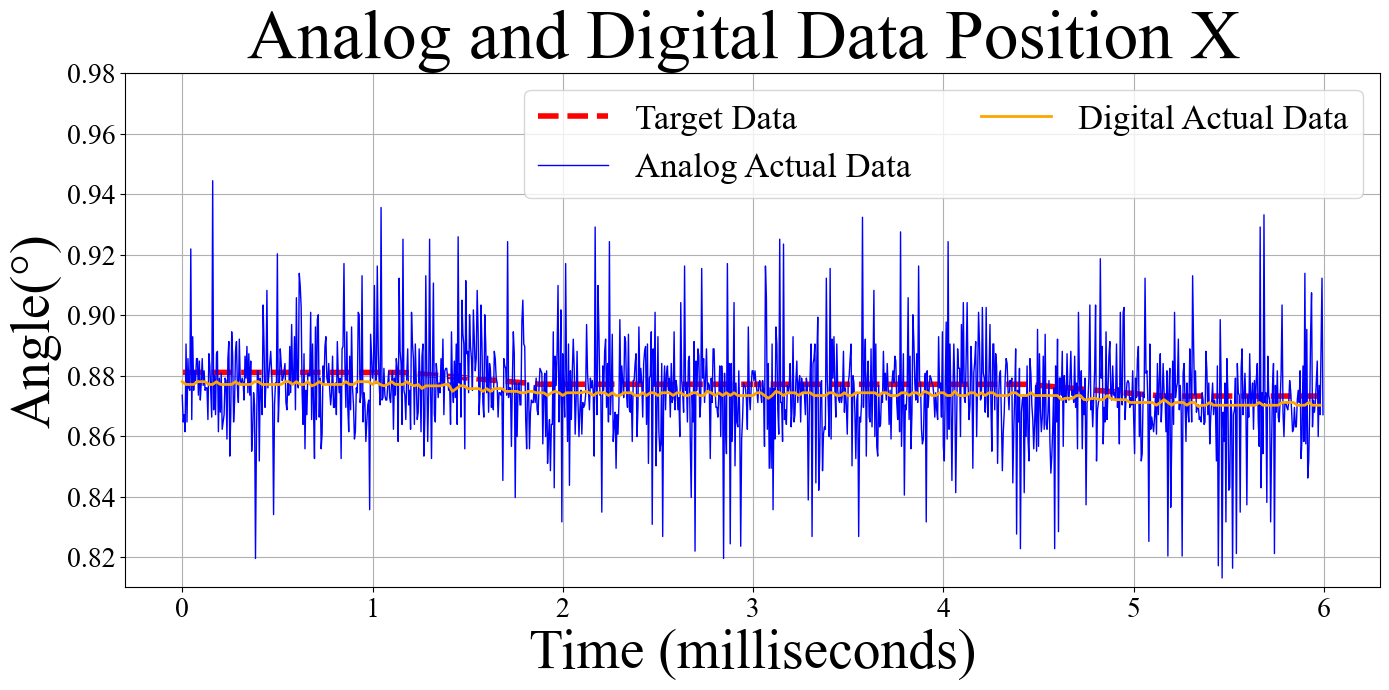

In [144]:
# Time domain setup
time_analog = np.arange(0, len(analog_actual_data_x_plot)) * 5e-3  # 5 milliseconds per index for analog
time_digital = np.arange(0, len(digital_actual_data_x_plot)) * 20e-3  # 20 milliseconds per index for digital

# Create a single plot for combined data
plt.figure(figsize=(14, 7))

# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Plot Analog Data
plt.plot(time_analog, analog_target_data_x_plot, label='Target Data', color='red', linewidth=4, linestyle='--', zorder=1)
plt.plot(time_analog, analog_actual_data_x_plot, label='Analog Actual Data', color='blue', linewidth=1, zorder=2)

# Plot Digital Data on the same plot with different time scale
plt.plot(time_digital, digital_actual_data_x_plot, label='Digital Actual Data', color='orange', linewidth=2, zorder=3)

# Amplified font sizes
plt.title('Analog and Digital Data Position X ', fontsize=50)
plt.xlabel('Time (milliseconds)', fontsize=40)
plt.ylabel('Angle(°)', fontsize=40)
plt.legend(fontsize=25, ncol = 2)
plt.ylim([0.81, 0.98])
plt.grid(True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

In [36]:
analog_shift = 18
digital_shift = 5

analog_actual_data_y_shift = analog_actual_data_y[analog_shift : ]
analog_target_data_y_shift = analog_target_data_y[: - analog_shift]

digital_actual_data_y_shift = digital_actual_data_y[:, digital_shift : ]
digital_target_data_y_shift = digital_target_data_y[: - digital_shift]

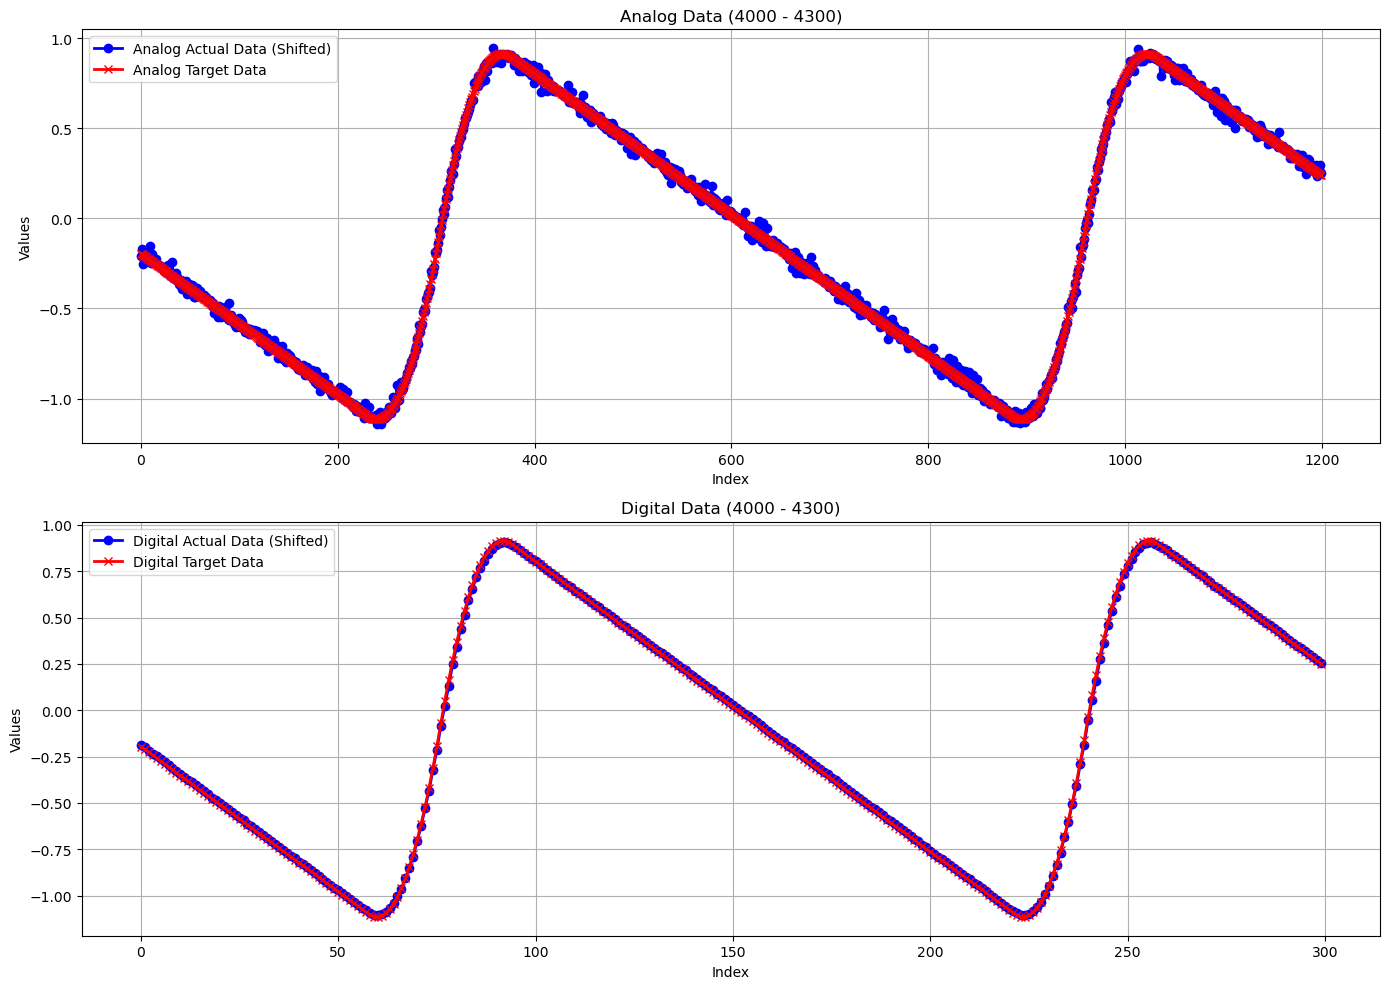

In [37]:
# Slice data for plotting (between 4000 and 4300 positions)
analog_actual_data_y_plot = analog_actual_data_y_shift[4000*4:4300*4]
analog_target_data_y_plot = analog_target_data_y_shift[4000*4:4300*4]

digital_actual_data_y_plot = digital_actual_data_y_shift[0, 4000:4300]  # Assuming the data is 2D and plotting the first column
digital_target_data_y_plot = digital_target_data_y_shift[4000:4300]  # Same assumption as above

# Create a 2x1 grid of subplots
plt.figure(figsize=(14, 10))

# Analog Data Plot
plt.subplot(2, 1, 1)
plt.plot(analog_actual_data_y_plot, label='Analog Actual Data (Shifted)', color='blue', marker='o', linewidth=2)
plt.plot(analog_target_data_y_plot, label='Analog Target Data', color='red', marker='x', linewidth=2)
plt.title('Analog Data (4000 - 4300)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Digital Data Plot
plt.subplot(2, 1, 2)
plt.plot(digital_actual_data_y_plot, label='Digital Actual Data (Shifted)', color='blue', marker='o', linewidth=2)
plt.plot(digital_target_data_y_plot, label='Digital Target Data', color='red', marker='x', linewidth=2)
plt.title('Digital Data (4000 - 4300)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

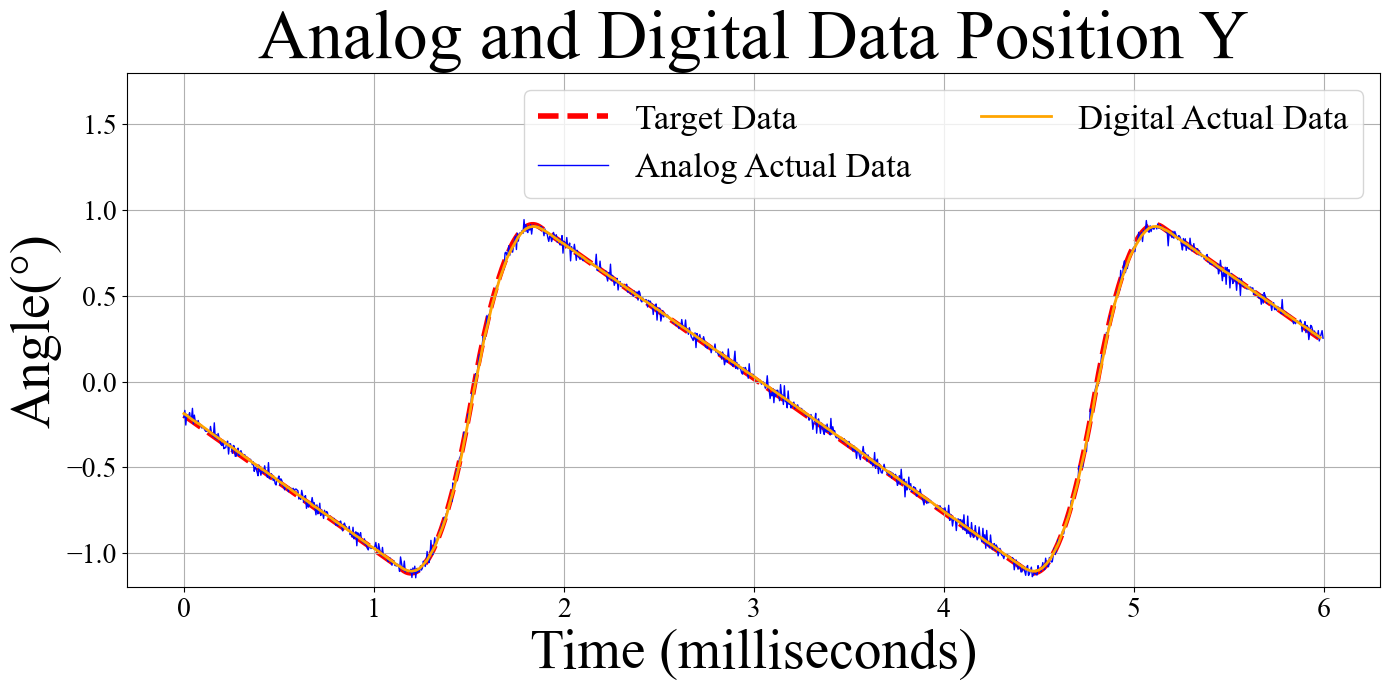

In [142]:
plt.rcParams["font.family"] = "Times New Roman"

# Create a single plot for combined data
plt.figure(figsize=(14, 7))

# Time domain setup
time_analog = np.arange(0, len(analog_actual_data_y_plot)) * 5e-3  # 5 milliseconds per index for analog
time_digital = np.arange(0, len(digital_actual_data_y_plot)) * 20e-3  # 20 milliseconds per index for digital

# Plot Analog Data
plt.plot(time_analog, analog_target_data_y_plot, label='Target Data', color='red', linewidth=4, linestyle='--', zorder=1)
plt.plot(time_analog, analog_actual_data_y_plot, label='Analog Actual Data', color='blue', linewidth=1, zorder=2)

# Plot Digital Data on the same plot with different time scale
plt.plot(time_digital, digital_actual_data_y_plot, label='Digital Actual Data', color='orange', linewidth=2, zorder=3)
#plt.plot(time_digital, digital_target_data_x_plot, label='Digital Target Data', color='magenta', marker='x', linewidth=1)

# Adding Titles and Labels
plt.title('Analog and Digital Data Position Y', fontsize=50)
plt.xlabel('Time (milliseconds)', fontsize=40)
plt.ylabel('Angle(°)', fontsize=40)
plt.legend(fontsize=25, ncol = 2)
plt.ylim([-1.2, 1.8])
plt.grid(True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [42]:
analog_error_data_x_plot = analog_actual_data_x_shift[4000*4 : 4300*4] - analog_target_data_x_shift[4000*4 : 4300*4]
digital_error_data_x_plot = digital_actual_data_x_shift[0, 4000 : 4300] - digital_target_data_x_shift[4000 : 4300]

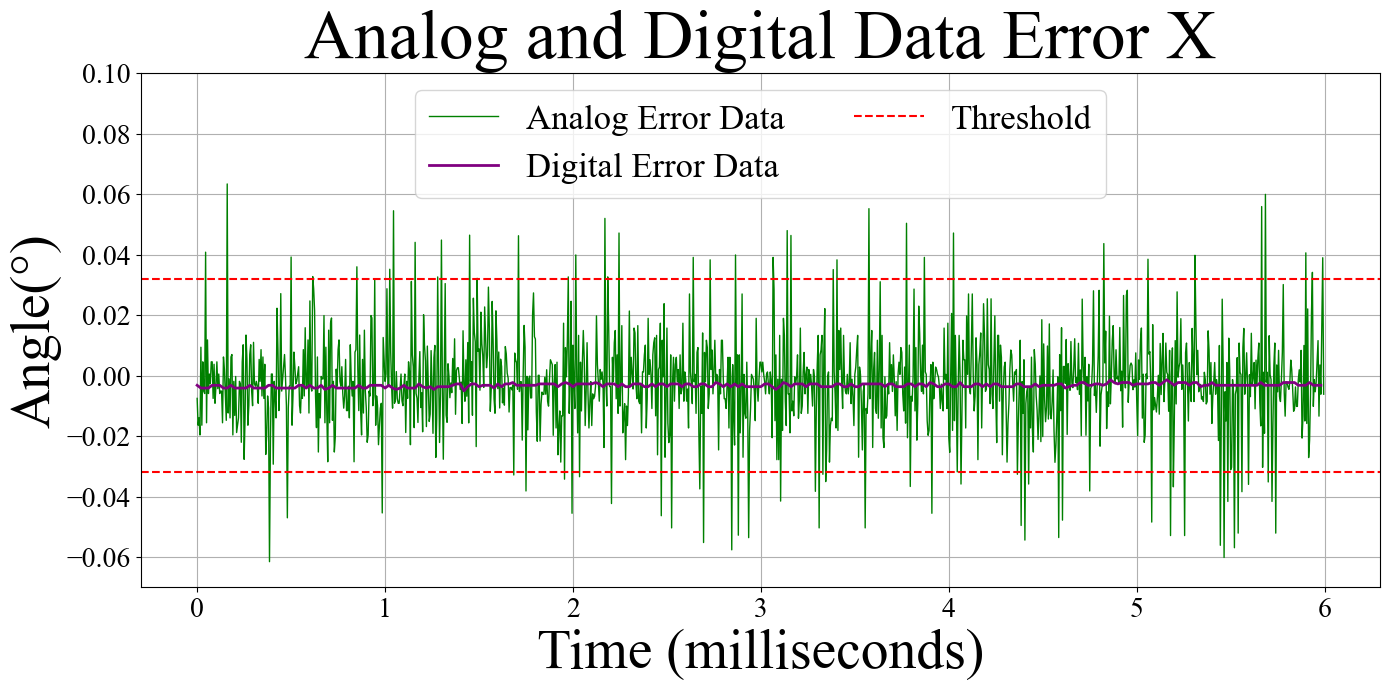

In [147]:
plt.rcParams["font.family"] = "Times New Roman"

# Time domain setup
time_analog = np.arange(0, len(analog_actual_data_x_plot)) * 5e-3  # 5 microseconds per index for analog
time_digital = np.arange(0, len(digital_actual_data_x_plot)) * 20e-3  # 20 microseconds per index for digital

# Create a single plot for combined data
plt.figure(figsize=(14, 7))

# Plot Error Data
plt.plot(time_analog, analog_error_data_x_plot, color='green', linewidth=1, label='Analog Error Data')
plt.plot(time_digital, digital_error_data_x_plot, color='purple', linewidth=2, label='Digital Error Data')

# Add horizontal lines
plt.axhline(y=0.032, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-0.032, color='red', linestyle='--')

plt.title('Analog and Digital Data Error X', fontsize=50)
plt.xlabel('Time (milliseconds)', fontsize=40)
plt.ylabel('Angle(°)', fontsize=40)
plt.legend(fontsize=25, ncol = 2)
plt.ylim([-0.07, 0.10])
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

In [48]:
analog_error_data_y_plot = analog_actual_data_y_shift[4000*4 : 4300*4] - analog_target_data_y_shift[4000*4 : 4300*4]
digital_error_data_y_plot = digital_actual_data_y_shift[0, 4000 : 4300] - digital_target_data_y_shift[4000 : 4300]

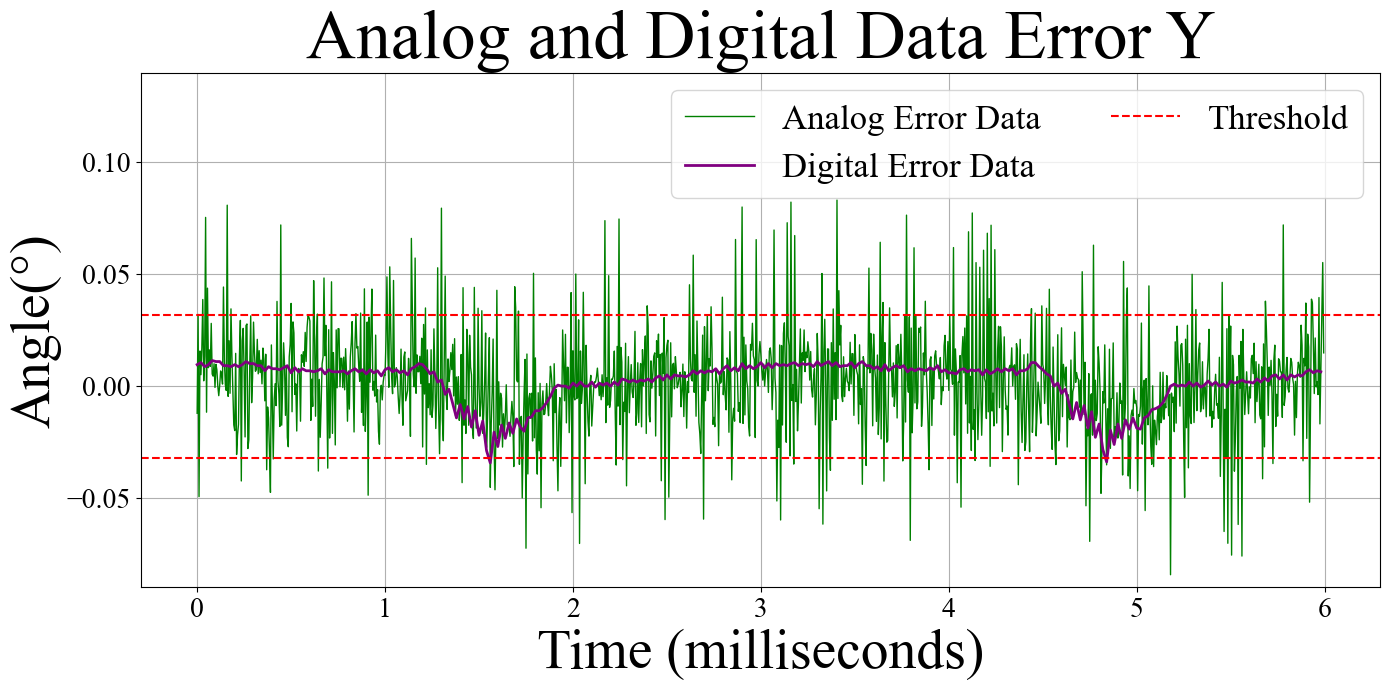

In [153]:
plt.rcParams["font.family"] = "Times New Roman"

# Time domain setup
time_analog = np.arange(0, len(analog_actual_data_y_plot)) * 5e-3  # 5 microseconds per index for analog
time_digital = np.arange(0, len(digital_actual_data_y_plot)) * 20e-3  # 20 microseconds per index for digital

# Create a single plot for combined data
plt.figure(figsize=(14, 7))

# Plot Error Data
plt.plot(time_analog, analog_error_data_y_plot, color='green', linewidth=1, label='Analog Error Data')
plt.plot(time_digital, digital_error_data_y_plot, color='purple', linewidth=2, label='Digital Error Data')

# Add horizontal lines
plt.axhline(y=0.032, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-0.032, color='red', linestyle='--')

plt.title('Analog and Digital Data Error Y', fontsize=50)
plt.xlabel('Time (milliseconds)', fontsize=40)
plt.ylabel('Angle(°)', fontsize=40)
plt.legend(fontsize=25, ncol = 2)
plt.ylim([-0.09, 0.14])
plt.grid(True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

In [100]:
analog_error_x = analog_actual_data_x_shift - analog_target_data_x_shift
analog_error_x.shape

analog_error_y = analog_actual_data_y_shift - analog_target_data_y_shift
analog_error_y.shape

(2079726,)

In [101]:
digital_error_x = digital_actual_data_x_shift - digital_target_data_x_shift
digital_error_x.shape

digital_error_y = digital_actual_data_y_shift - digital_target_data_y_shift
digital_error_y.shape

(4, 83835)

In [102]:
# Calculate RMSE
rmse = np.sqrt(np.mean(analog_error_x[0:4*83835] ** 2))

# Calculate MAE
mae = np.mean(np.abs(analog_error_x[0:4*83835]))

# Calculate SD
sd = np.std(analog_error_x)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"SD: {sd}")

RMSE: 0.018770658711430688
MAE: 0.013966835372256212
SD: 0.018514787213132593


In [103]:
# Calculate RMSE
rmse = np.sqrt(np.mean(digital_error_x ** 2))

# Calculate MAE
mae = np.mean(np.abs(digital_error_x))

# Calculate SD
sd = np.std(digital_error_x)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"SD: {sd}")

RMSE: 0.009766704734599077
MAE: 0.0077920648530805485
SD: 0.007442603031073179


In [104]:
# Calculate RMSE
rmse = np.sqrt(np.mean(analog_error_y[0:4*83835] ** 2))

# Calculate MAE
mae = np.mean(np.abs(analog_error_y[0:4*83835]))

# Calculate SD
sd = np.std(analog_error_y)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"SD: {sd}")

RMSE: 0.023863098761036882
MAE: 0.01744713780000328
SD: 0.024109313563774847


In [105]:
# Calculate RMSE
rmse = np.sqrt(np.mean(digital_error_y ** 2))

# Calculate MAE
mae = np.mean(np.abs(digital_error_y))

# Calculate SD
sd = np.std(digital_error_y)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"SD: {sd}")

RMSE: 0.009531534489458593
MAE: 0.00787286081005239
SD: 0.009206628386604448
